In [1]:
pip install tweepy
import tweepy
consumer_key = "R6ttyEWYJOw0vhiGhcDihtgij"
consumer_secret = "LNsxFqquRo2hLdORGgigpN3AHejbS4yLztRrjqqqP7unsILyaY"
access_token = "1496626284-zCdDarZGAd027k83rp2rGpiz6wOZksOFyxglT1c"
access_secret = "2AgISXtcpZoPKXfLDC4Y0larSIfQ624D6rBI2q0mK9vBi"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)



Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [1]:
# Q 1.2

import tweepy
import json
import mysql.connector

with open('config.json') as cf:
    config = json.load(cf)
consumer_key = config['consumer_key']
consumer_secret = config['consumer_secret']

access_token = config['access_token']
access_token_secret = config['access_token_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth)
user_ids = [15506669, 6377902, 25073877, 155659213, 158487331, 90836187, 136007061, 50393960, 1636590253, 805115720]

db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="",
  database="assignment4"
)

cursor = db.cursor()
sql = "INSERT INTO users (screen_name, username, location, description, num_of_follows, num_of_friends, num_of_statuses, url) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"

values = []
for user_id in user_ids:
    user = api.get_user(user_id)
    values.append((user.screen_name, user.name, user.location, user.description, user.followers_count, user.friends_count, user.statuses_count, user.url))

cursor.executemany(sql, values)
db.commit()


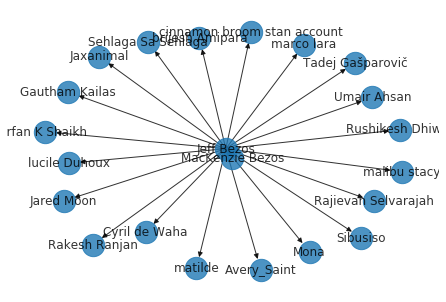

In [4]:
# Q 1.3

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tweepy
import json

with open('config.json') as cf:
    config = json.load(cf)
consumer_key = config['consumer_key']
consumer_secret = config['consumer_secret']

access_token = config['access_token']
access_token_secret = config['access_token_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
user_id = 15506669
user = api.get_user(user_id)

follower_names = []
friend_names = []

followers = api.followers(user_id)
friends = api.friends(user_id)

from_arr = []
follower_count = len(followers)
friend_count = len(friends)

for x in range(follower_count + friend_count):
    from_arr.append(user.name)

for friend in friends:
    from_arr.append(friend.name)

to_arr = []

for follower in followers:
    to_arr.append(follower.name)

for friend in friends:
    to_arr.append(friend.name)

for x in range(friend_count):
    to_arr.append(user.name)

df = pd.DataFrame({'from': from_arr, 'to': to_arr})

G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())

nx.draw(G, with_labels=True, node_size=500, alpha=0.8, arrows=True)
font = {'family': 'normal',
        'weight': 'normal',
        'size': 20}
plt.rc('font', **font)
plt.show()

In [1]:
# Q 1.4

import tweepy
import json

with open('config.json') as cf:
    config = json.load(cf)
consumer_key = config['consumer_key']
consumer_secret = config['consumer_secret']

access_token = config['access_token']
access_token_secret = config['access_token_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth)
search_query1 = "Texas OR weather"
tweets = tweepy.Cursor(api.search, q=search_query1).items(100)
json_formatted_data = json.dumps([tweet.text for tweet in tweets])
with open('data_a.json', 'w') as outputfile_a:
    json.dump(json_formatted_data, outputfile_a, indent=4, sort_keys=True)
    outputfile_a.close()

search_query2 = "#UNT since:2019-07-20 until:2019-07-28"
tweets = tweepy.Cursor(api.search, q=search_query2).items(100)
json_formatted_data = json.dumps([tweet.text for tweet in tweets])
with open('data_b.json', 'w') as outputfile_b:
    json.dump(json_formatted_data, outputfile_b, indent=4, sort_keys=True)
    outputfile_b.close()

search_query3 = "bounding_box:[-86.33 41.63 -86.20 41.74]"
tweets = tweepy.Cursor(api.search, q=search_query3).items(100)
json_formatted_data = json.dumps([tweet.text for tweet in tweets])
with open('data_c.json', 'w') as outputfile_c:
    json.dump(json_formatted_data, outputfile_c, indent=4, sort_keys=True)
    outputfile_c.close()

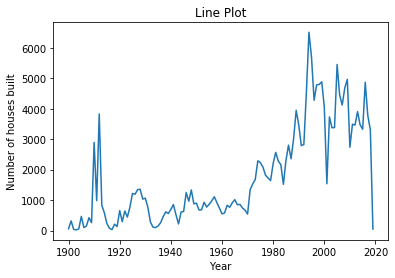

In [6]:
# Q 2.1

import matplotlib.pyplot as plt
import pandas

df = pandas.read_csv('assignment_4_property_tax_report_2019.csv')
year_built_list = df['YEAR_BUILT'].tolist()

years = []
num_of_houses = []
for year in range(1900, 2020):
    years.append(year)
    num_of_houses.append(year_built_list.count(year))

plt.plot(years, num_of_houses)
plt.xlabel('Year')
plt.ylabel('Number of houses built')
plt.title('Line Plot')
plt.show()

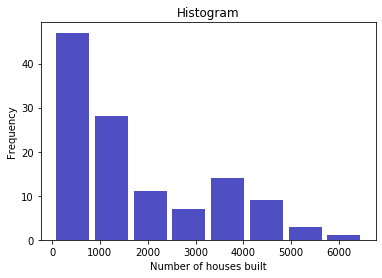

In [7]:
# Q 2.2

import matplotlib.pyplot as plt
import pandas

df = pandas.read_csv('assignment_4_property_tax_report_2019.csv')
year_built_list = df['YEAR_BUILT'].tolist()

num_of_houses = []
for year in range(1900, 2020):
    num_of_houses.append(year_built_list.count(year))

plt.hist(x=num_of_houses, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Number of houses built')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

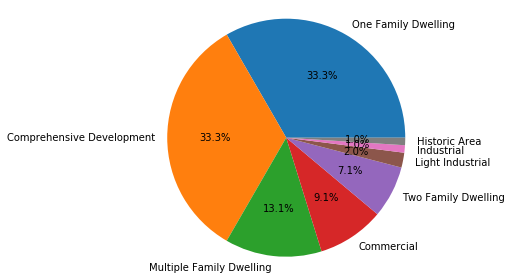

In [8]:
# Q 2.3

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('assignment_4_property_tax_report_2019.csv')

total_houses = len(df)
# Remove rows with empty cell in zone category colunm
df['ZONE_CATEGORY'].replace('', np.nan, inplace=True)
df.dropna(subset=['ZONE_CATEGORY'], inplace=True)

zone_category_list = df['ZONE_CATEGORY'].tolist()
available_zone_categories = list(dict.fromkeys(zone_category_list))

num_of_houses = []
for category in available_zone_categories:
    ratio = round(zone_category_list.count(category)/float(total_houses), 2) * 100
    num_of_houses.append(ratio)

top_eight_zones = sorted(zip(num_of_houses, available_zone_categories), reverse=True)[:8]
columns = ['ratio', 'zone_category']
df = pd.DataFrame(top_eight_zones, columns=columns)

fig1, ax1 = plt.subplots()
ax1.pie(df['ratio'].tolist(), labels=df['zone_category'].tolist(), autopct='%1.1f%%')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


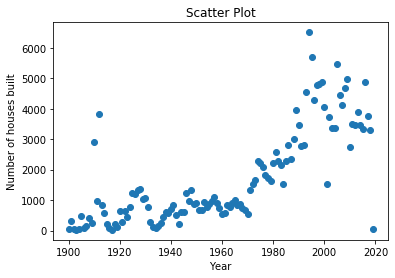

In [9]:
# Q 2.4

import matplotlib.pyplot as plt
import pandas

df = pandas.read_csv('assignment_4_property_tax_report_2019.csv')
year_built_list = df['YEAR_BUILT'].tolist()

years = []
num_of_houses = []
for year in range(1900, 2020):
    years.append(year)
    num_of_houses.append(year_built_list.count(year))

plt.scatter(years, num_of_houses)
plt.xlabel('Year')
plt.ylabel('Number of houses built')
plt.title('Scatter Plot')
plt.show()